<a href="https://colab.research.google.com/github/Eliecer91/Telecom_X_Parte_2/blob/main/Desafio_Telecom_XParte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción del Archivo Tratado en Telecom X parte 1

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_final = pd.read_csv('https://raw.githubusercontent.com/Eliecer91/Telecom_X_Parte_2/main/df_final.csv')
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.16
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.97
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.43
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.22
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.76


# Verificación de la Proporción de Cancelación (Churn)

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [3]:
proporcion_canc = df_final['Churn'].value_counts(normalize=True)*100
proporcion_canc

,proportion
Churn,
0,74.280996
1,25.719004


# Eliminación de Columnas Irrelevantes

   ### Preparar los datos para el modelado (tratamiento, codificación, normalización).


In [4]:
df_final = df_final.drop([], axis=1)
df_final = df_final.drop([], axis=1)

In [5]:
df_final = df_final.drop(['Cuentas_Diarias'], axis=1)

In [6]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   int64  
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   int64  
 11  OnlineBackup      7267 non-null   int64  
 12  DeviceProtection  7267 non-null   int64  
 13  TechSupport       7267 non-null   int64  
 14  StreamingTV       7267 non-null   int64  
 15  StreamingMovies   7267 non-null   int64  
 16  Contract          7267 non-null   object 


In [7]:
#columnas_categoricas = df_telecom2.select_dtypes(include=['object']).columns
#columnas_categoricas

In [8]:
#df_dummies = pd.get_dummies(df_telecom2,columns=columnas_categoricas, drop_first=True)
#df_dummies.head()

#    Realizar análisis de correlación y selección de variables.


 ## Correlación y Selección de Variables

In [9]:
df_final_num = df_final


In [10]:
df_final_num['gender']= df_final_num['gender'].replace({'Male':0,'Female':1})

/tmp/ipython-input-639291141.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final_num['gender']= df_final_num['gender'].replace({'Male':0,'Female':1})


In [11]:
df_final_num['InternetService']= df_final_num['InternetService'].replace({'Fiber optic':0,'DSL':1,'No':2})

/tmp/ipython-input-875140033.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final_num['InternetService']= df_final_num['InternetService'].replace({'Fiber optic':0,'DSL':1,'No':2})


In [12]:
df_final_num['Contract']= df_final_num['Contract'].replace({'Month-to-month':0,'Two year':1,'One year':2})

/tmp/ipython-input-3162158069.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final_num['Contract']= df_final_num['Contract'].replace({'Month-to-month':0,'Two year':1,'One year':2})


In [13]:
df_final_num['PaymentMethod']= df_final_num['PaymentMethod'].replace({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})

/tmp/ipython-input-2469453963.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final_num['PaymentMethod']= df_final_num['PaymentMethod'].replace({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})


In [14]:
df_final_num = df_final_num.drop('customerID', axis=1)
corr = df_final_num.corr()

In [15]:
corr['Churn']

,Churn
Churn,1.000000
gender,0.009555
SeniorCitizen,0.146733
Partner,-0.148546
Dependents,-0.161384
tenure,-0.344079
PhoneService,0.012571
MultipleLines,0.039343
InternetService,-0.310110
OnlineSecurity,-0.166828


### Evaluar multicolinearidad

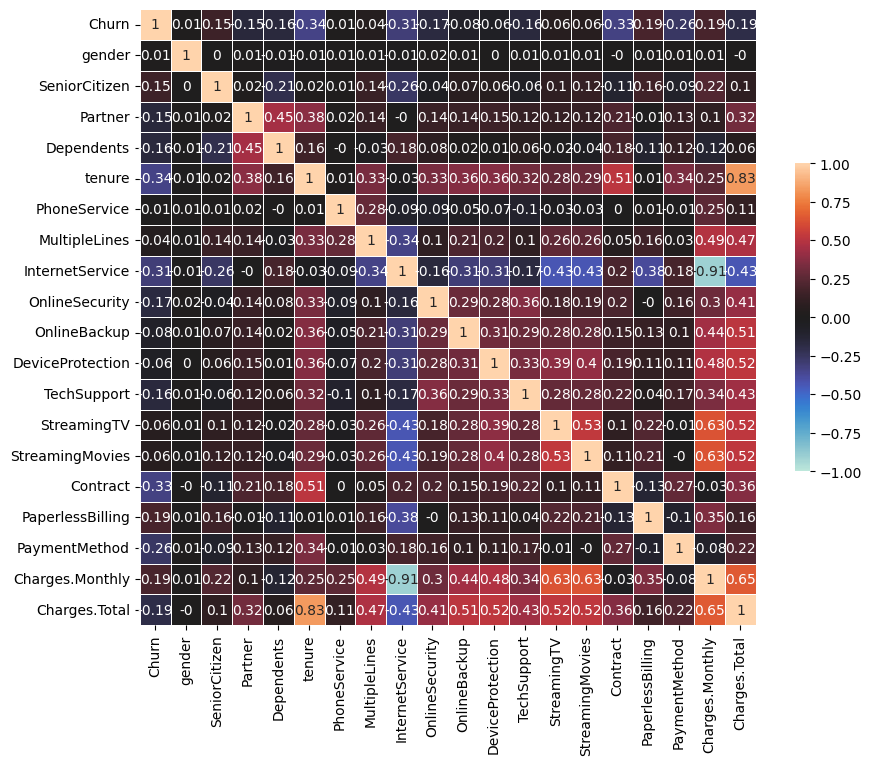

In [16]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(np.round(corr,2), vmax = 1, vmin = -1, center = 0,
                          square = True, linewidths=.5,  annot=True, cbar_kws={"shrink": .5})

plt.show()

## Análisis Dirigido

Investiga cómo variables específicas se relacionan con la cancelación, tales como:

    Tiempo de contrato × Cancelación

    Gasto total × Cancelación

Utiliza gráficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

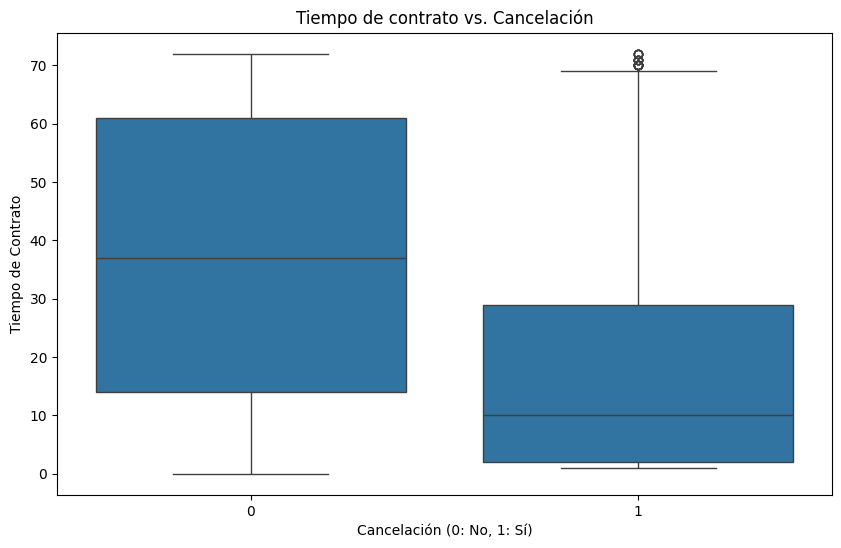

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df_final)
plt.title('Tiempo de contrato vs. Cancelación')
plt.xlabel('Cancelación (0: No, 1: Sí)')
plt.ylabel('Tiempo de Contrato')
plt

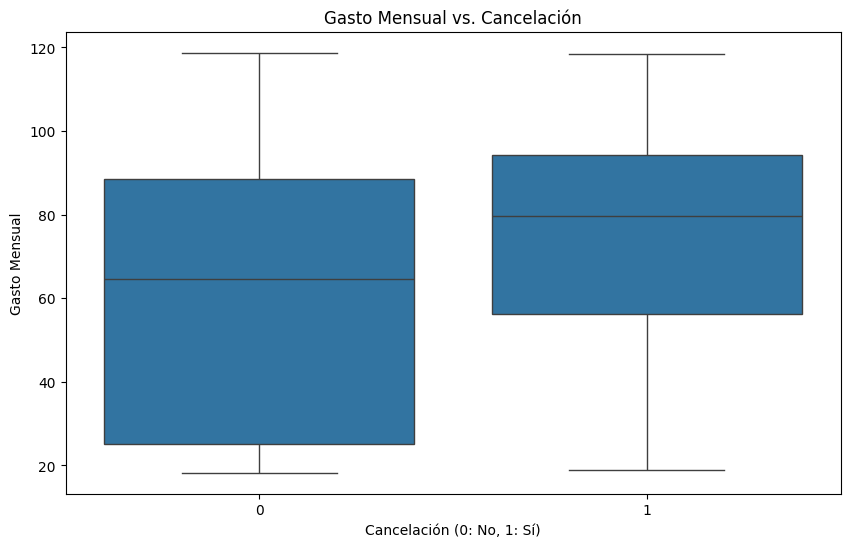

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='Charges.Monthly', data=df_final)
plt.title('Gasto Mensual vs. Cancelación')
plt.xlabel('Cancelación (0: No, 1: Sí)')
plt.ylabel('Gasto Mensual')
plt.show() # Added plt.show() to display the plot

### Seleccion de Variables

In [34]:
X = df_final.drop('Churn', axis=1)
y = df_final.Churn

# Drop the customerID column as it is not needed for modeling
X = X.drop('customerID', axis=1)

In [35]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


### Transformando variables explicativas

In [36]:
columnas = X.columns

In [37]:
met_one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                      ['gender','InternetService','Contract','PaymentMethod']),
                                      remainder='passthrough',
                                      sparse_threshold=0,
                                      force_int_remainder_cols=False)

In [38]:
X = met_one_hot.fit_transform(X)


In [39]:
met_one_hot.get_feature_names_out(columnas)

array(['onehotencoder__gender_1', 'onehotencoder__InternetService_0',
       'onehotencoder__InternetService_1',
       'onehotencoder__InternetService_2', 'onehotencoder__Contract_0',
       'onehotencoder__Contract_1', 'onehotencoder__Contract_2',
       'onehotencoder__PaymentMethod_0', 'onehotencoder__PaymentMethod_1',
       'onehotencoder__PaymentMethod_2', 'onehotencoder__PaymentMethod_3',
       'remainder__SeniorCitizen', 'remainder__Partner',
       'remainder__Dependents', 'remainder__tenure',
       'remainder__PhoneService', 'remainder__MultipleLines',
       'remainder__OnlineSecurity', 'remainder__OnlineBackup',
       'remainder__DeviceProtection', 'remainder__TechSupport',
       'remainder__StreamingTV', 'remainder__StreamingMovies',
       'remainder__PaperlessBilling', 'remainder__Charges.Monthly',
       'remainder__Charges.Total'], dtype=object)

In [40]:
pd.DataFrame(X, columns=met_one_hot.get_feature_names_out(columnas))


,onehotencoder__gender_1,onehotencoder__InternetService_0,onehotencoder__InternetService_1,onehotencoder__InternetService_2,onehotencoder__Contract_0,onehotencoder__Contract_1,onehotencoder__Contract_2,onehotencoder__PaymentMethod_0,onehotencoder__PaymentMethod_1,onehotencoder__PaymentMethod_2,...,remainder__MultipleLines,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90
7263,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70
7264,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75
7265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65


### Transformando variable respuesta

In [41]:
y = y.to_numpy(y)


In [42]:
y

array([0, 0, 1, ..., 0, 0, 0])

##  Entrenar dos o más modelos de clasificación.

### creando datos de entrenamiento y prueba

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Balanceo de datos con SMOTE

In [45]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [46]:
df_X_train = pd.DataFrame(X_train, columns=met_one_hot.get_feature_names_out(columnas))
df_X_train

,onehotencoder__gender_1,onehotencoder__InternetService_0,onehotencoder__InternetService_1,onehotencoder__InternetService_2,onehotencoder__Contract_0,onehotencoder__Contract_1,onehotencoder__Contract_2,onehotencoder__PaymentMethod_0,onehotencoder__PaymentMethod_1,onehotencoder__PaymentMethod_2,...,remainder__MultipleLines,remainder__OnlineSecurity,remainder__OnlineBackup,remainder__DeviceProtection,remainder__TechSupport,remainder__StreamingTV,remainder__StreamingMovies,remainder__PaperlessBilling,remainder__Charges.Monthly,remainder__Charges.Total
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,107.45,7658.30
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.85,108.05
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,106.25,6979.80
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,79.30,2427.10
4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,90.90,1259.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50.35,237.25
5082,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,80.20,3581.60
5083,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.85,892.15
5084,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,58.75,2203.10


### Creando modelo de referencia - Baseline

In [47]:
from sklearn.dummy import DummyClassifier

In [48]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.7427785419532325

In [49]:
dummy = DummyClassifier()
dummy.fit(X_train_smote, y_train_smote)

dummy.score(X_test, y_test)

0.7427785419532325

### Modelo de arbol de decisión

In [50]:
valores_columnas = met_one_hot.get_feature_names_out()

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
modelo_arbol = DecisionTreeClassifier(random_state=5, max_depth=3)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [53]:
modelo_arbol.score(X_test, y_test)

0.7922971114167813

In [54]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

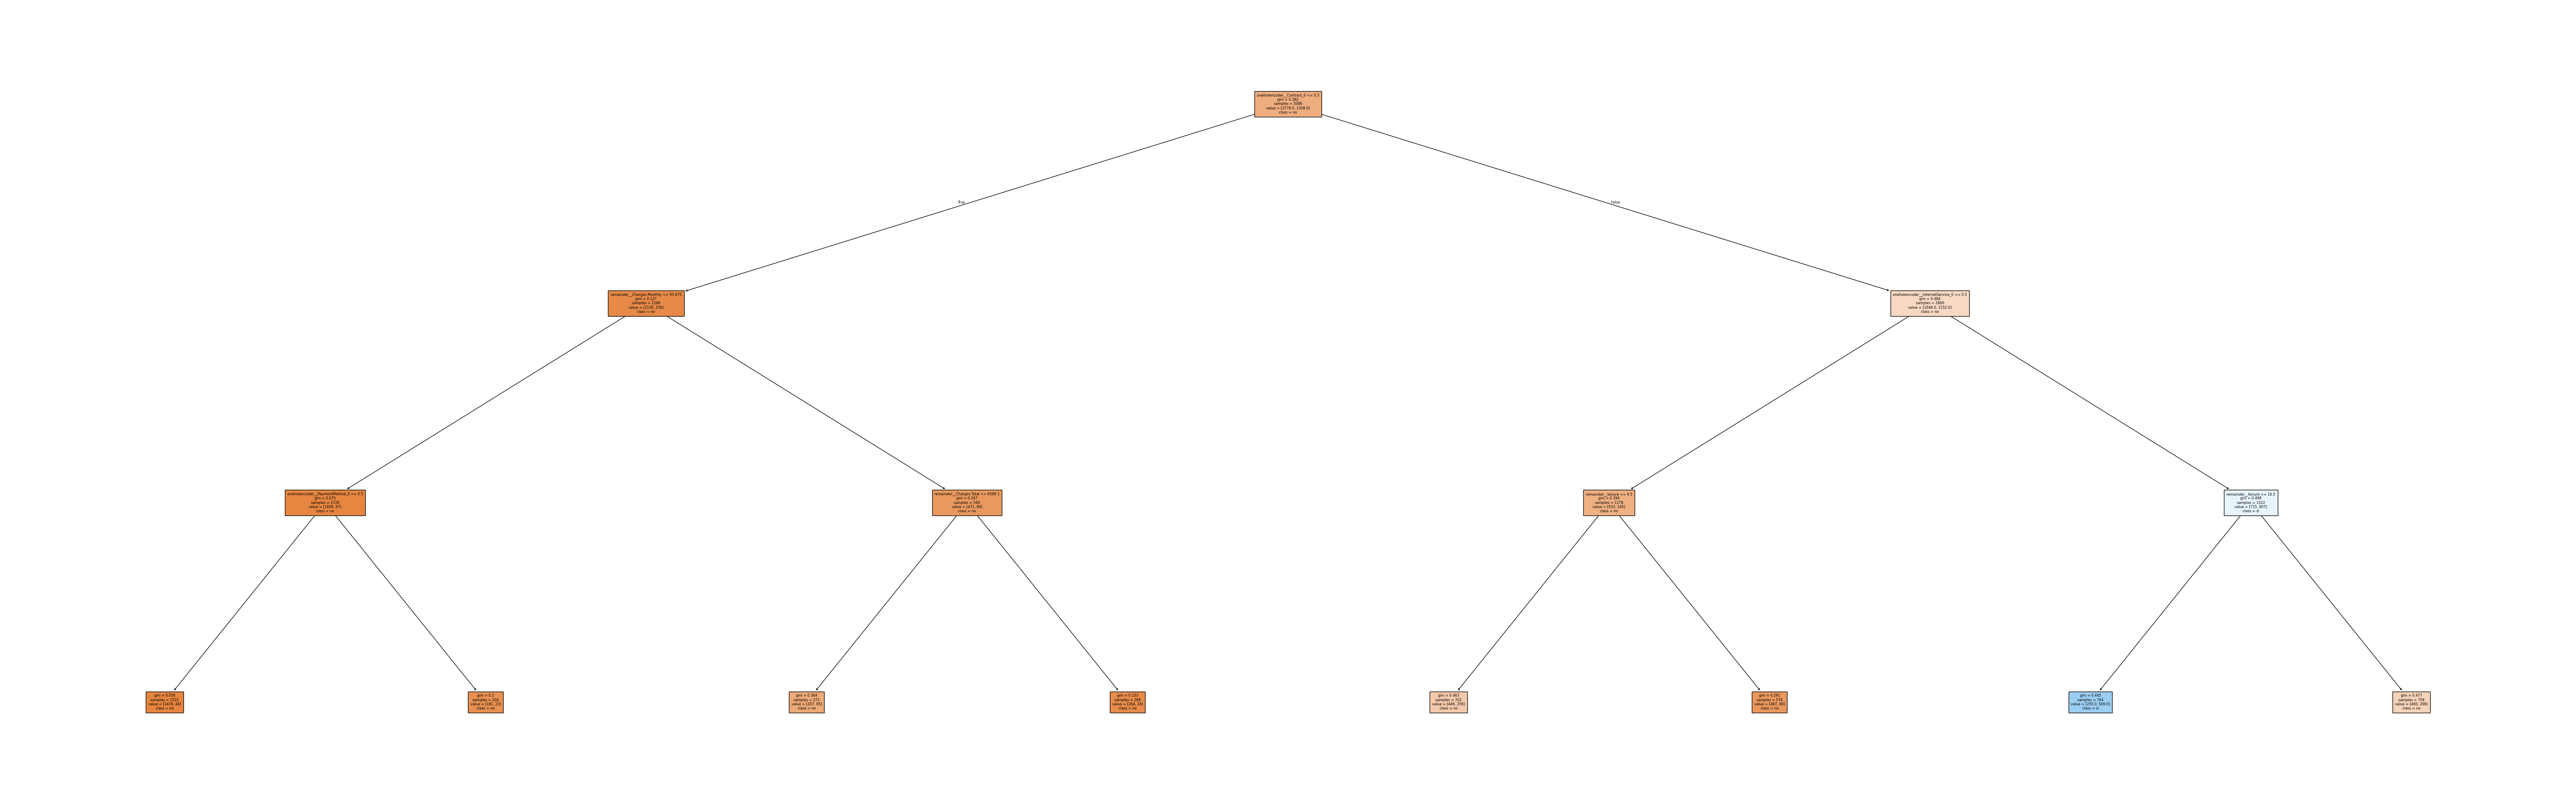

In [55]:
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol,filled=True, class_names=['no','si'],fontsize=6, feature_names=valores_columnas.tolist())
plt.show()

In [56]:
modelo_arbol.score(X_train, y_train)

0.7927644514353126

In [57]:
modelo_arbol = DecisionTreeClassifier(random_state=5, max_depth=3)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [58]:
modelo_arbol.score(X_test, y_test)

0.7922971114167813

### Modelo KNN

#### Normalizando datos para usar en modelo KNN

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
normalizacion = MinMaxScaler()
X_train_norm = normalizacion.fit_transform(X_train_smote)
X_test_norm = normalizacion.transform(X_test)

In [68]:
pd.DataFrame(X_train_smote)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,1.000000,0.000000,107.450000,7658.300000
1,1.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,19.850000,108.050000
2,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,106.250000,6979.800000
3,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.0,1.000000,1.000000,1.000000,79.300000,2427.100000
4,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,90.900000,1259.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7551,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.592284,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.407716,1.000000,79.047960,1706.829280
7552,1.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,70.168382,70.168382
7553,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.000000,0.000000,0.000000,...,0.828705,0.171295,0.000000,0.000000,0.0,0.000000,0.828705,1.000000,82.077097,790.424072
7554,0.172643,1.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.827357,...,0.827357,0.000000,0.827357,0.000000,0.0,0.000000,0.000000,1.000000,78.859887,899.852203


In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn = KNeighborsClassifier()


In [71]:
knn.fit(X_train_norm, y_train_smote)

KNeighborsClassifier()

In [73]:
knn.score(X_test_norm, y_test)

0.6836313617606602

# Modelo RamdomForetClassifier

In [74]:

from sklearn.ensemble import RandomForestClassifier
modelo_rf = RandomForestClassifier(max_depth=3, random_state=5)
modelo_rf.fit(X_train, y_train)
modelo_rf.score(X_test, y_test)

0.7927556166895919

## Matriz de confusión

In [75]:
from sklearn.metrics import confusion_matrix
y_previsto = modelo_arbol.predict(X_test)
matriz_confusion1 = confusion_matrix(y_test,y_previsto)
matriz_confusion1

array([[1500,  120],
       [ 333,  228]])

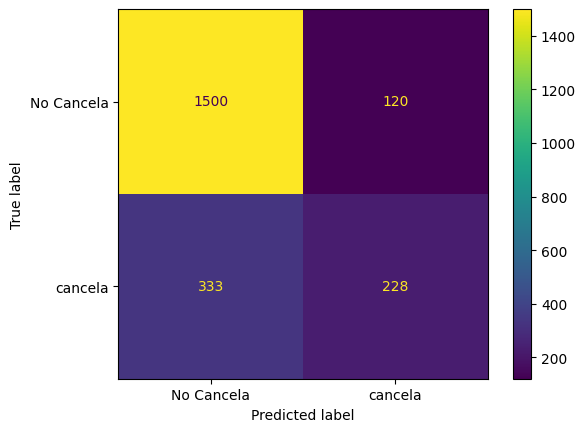

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion1, display_labels=['No Cancela','cancela'])
visualizacion.plot();

    Interpretar los resultados, incluyendo la importancia de las variables.

    Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.



## Evaluar el rendimiento de los modelos con métricas.

# Evaluación de los Modelos

### Evaluando modelo arbol de decisión

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = modelo_arbol.predict(X_test)

print(f'La Exactitud (Accuracy) del modelo de arbol es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo de arbol es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo de arbol es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo de arbol es: {f1_score(y_test, y_pred):.4f}')

La Exactitud (Accuracy) del modelo de arbol es: 0.7923
La Precisión (Precision) del modelo de arbol es: 0.6552
La Sensibilidad (Recall) del modelo de arbol es: 0.4064
El F1-Score del modelo de arbol es: 0.5017


### Evaluando modelo KNN

In [78]:
y_pred = knn.predict(X_test)

print(f'La Exactitud (Accuracy) del modelo KNN es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo KNN es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo KNN es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo KNN es: {f1_score(y_test, y_pred):.4f}')

La Exactitud (Accuracy) del modelo KNN es: 0.7428
La Precisión (Precision) del modelo KNN es: 0.0000
La Sensibilidad (Recall) del modelo KNN es: 0.0000
El F1-Score del modelo KNN es: 0.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Evaluando Modelo RamdomForetClassifier

In [79]:
y_pred = modelo_rf.predict(X_test)

print(f'La Exactitud (Accuracy) del modelo Ramdom Forest es: {accuracy_score(y_test, y_pred):.4f}')
print(f'La Precisión (Precision) del modelo Ramdom Forest es: {precision_score(y_test, y_pred):.4f}')
print(f'La Sensibilidad (Recall) del modelo Ramdom Forest es: {recall_score(y_test, y_pred):.4f}')
print(f'El F1-Score del modelo Ramdom Forest es: {f1_score(y_test, y_pred):.4f}')

La Exactitud (Accuracy) del modelo Ramdom Forest es: 0.7928
La Precisión (Precision) del modelo Ramdom Forest es: 0.6886
La Sensibilidad (Recall) del modelo Ramdom Forest es: 0.3547
El F1-Score del modelo Ramdom Forest es: 0.4682


El mejor modelo es arbol de decisión.

ya que es el que tiene el mejor F1-score.

Buen equilibrio entre precisión, recall y F1-Score .


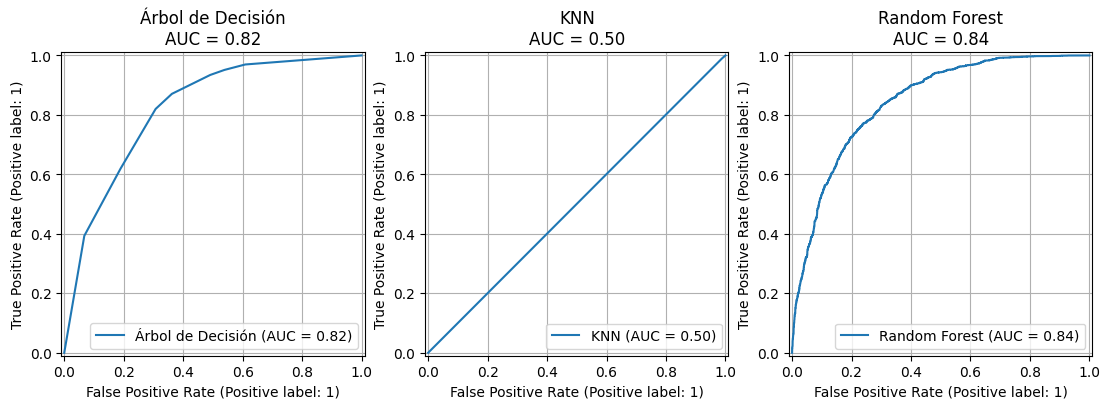

In [80]:

from sklearn.metrics import RocCurveDisplay, roc_auc_score
import matplotlib.pyplot as plt

# Lista de modelos con sus nombres
modelos = [
    ('Árbol de Decisión', modelo_arbol),
    ('KNN', knn),
    ('Random Forest', modelo_rf),
]


fig, axes = plt.subplots(1, 4, figsize=(18, 10))
axes = axes.flatten()

for i, (nombre, modelo) in enumerate(modelos):
    ax = axes[i]

    # Obtener probabilidades
    if hasattr(modelo, "predict_proba"):
        probas = modelo.predict_proba(X_train_smote)[:, 1]
    elif hasattr(modelo, "decision_function"):
        probas = modelo.decision_function(X_train_smote)
    else:
        print(f"El modelo {nombre} no tiene método predict_proba ni decision_function.")
        continue

    # Mostrar curva ROC
    RocCurveDisplay.from_predictions(y_train_smote, probas, ax=ax, name=nombre)

    # Título con AUC
    auc = roc_auc_score(y_train_smote, probas)
    ax.set_title(f"{nombre}\nAUC = {auc:.2f}")
    ax.grid(True)

fig.delaxes(axes[-1])


plt.show()


# Features

In [81]:
from imblearn.pipeline import Pipeline as imbpipeline

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import KFold,cross_validate
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import pickle


#  Modelos Adicionales: Regresión Logística, SVM y XGBoost

In [82]:

# Regresión Logística
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(X_train, y_train)
print("Accuracy Regresión Logística:", modelo_log.score(X_test, y_test))

Accuracy Regresión Logística: 0.801467216872994


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: title={'center': 'Importancia de variables - Regresión Logística'}>

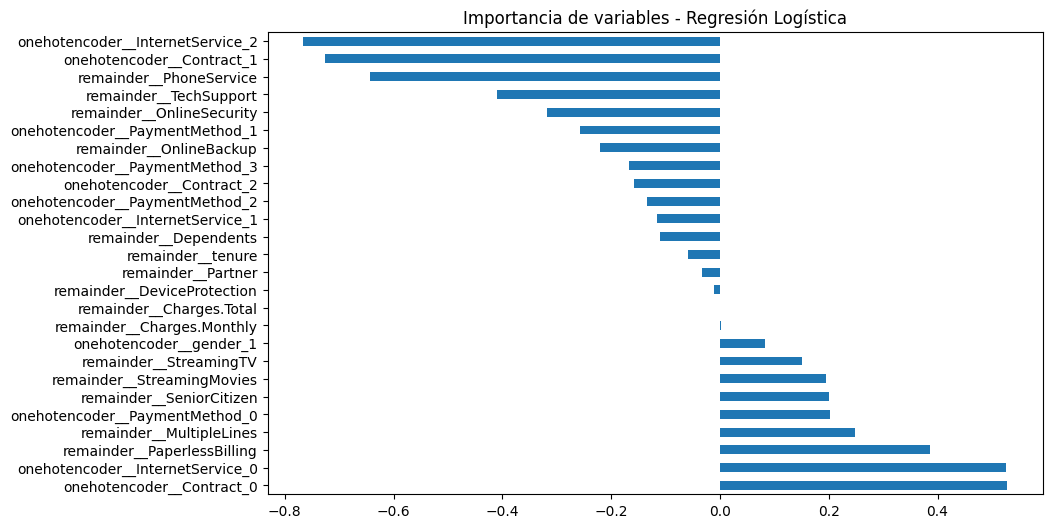

In [83]:
# Coeficientes de las variables (importancia relativa)
coef_log = pd.Series(modelo_log.coef_[0], index=df_X_train.columns)
coef_log.sort_values(ascending=False).plot(kind='barh', figsize=(10,6), title='Importancia de variables - Regresión Logística')


In [84]:
# SVM (Support Vector Machine)
from sklearn.svm import SVC

modelo_svm = SVC(kernel='linear')
modelo_svm.fit(X_train, y_train)
print("Accuracy SVM:", modelo_svm.score(X_test, y_test))

Accuracy SVM: 0.8010087116001834


<Axes: title={'center': 'Importancia de variables - SVM'}>

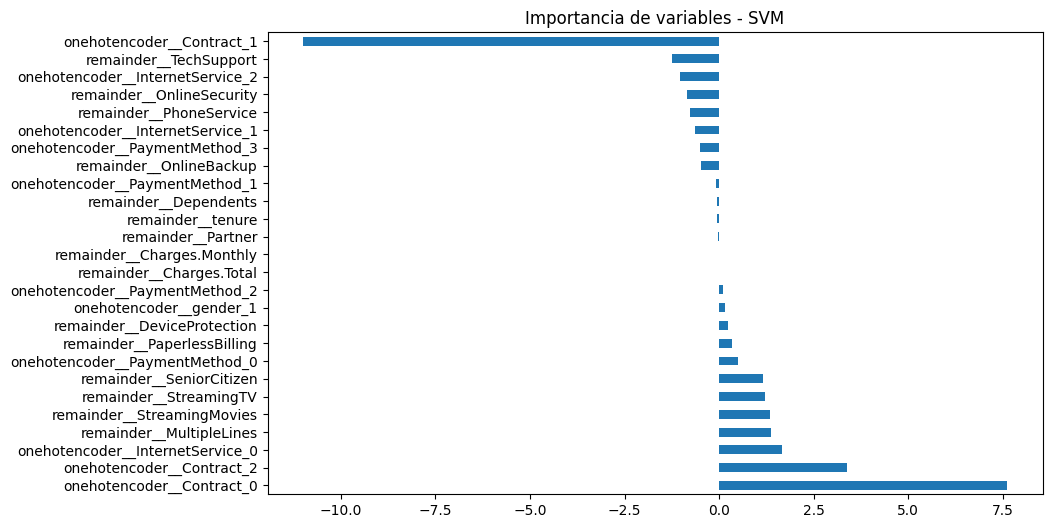

In [86]:

# Coeficientes (solo si kernel='linear')
coef_svm = pd.Series(modelo_svm.coef_[0], index=df_X_train.columns)
coef_svm.sort_values(ascending=False).plot(kind='barh', figsize=(10,6), title='Importancia de variables - SVM')

In [87]:

# XGBoost
from xgboost import XGBClassifier

modelo_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
modelo_xgb.fit(X_train, y_train)
print("Accuracy XGBoost:", modelo_xgb.score(X_test, y_test))


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:53:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy XGBoost: 0.7817514901421366


<Axes: title={'center': 'Importancia de variables - XGBoost'}>

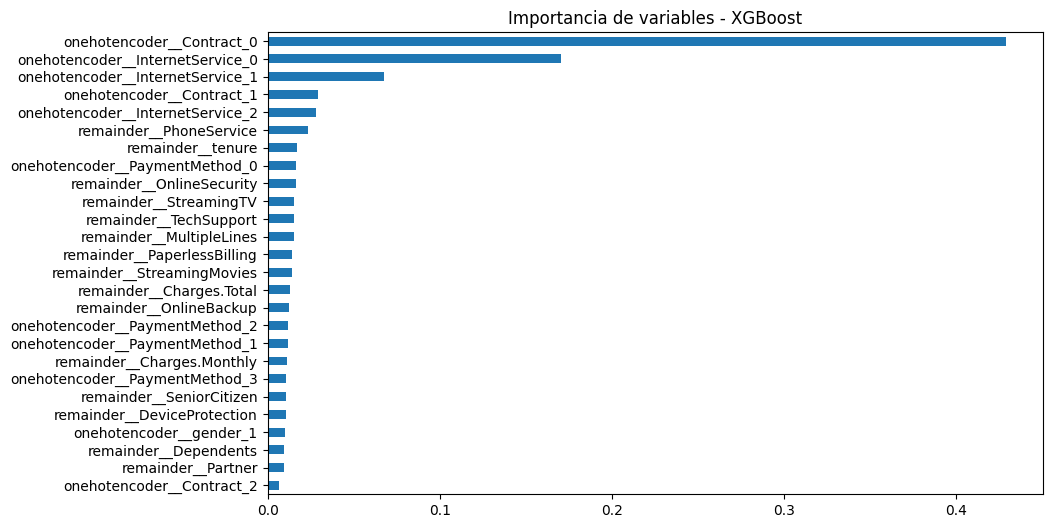

In [88]:

# Importancia de variables - XGBoost
importances = pd.Series(modelo_xgb.feature_importances_, index=df_X_train.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), title='Importancia de variables - XGBoost')


# Conclusiones

## ✅ Conclusión Final: Estrategias para Evitar la Cancelación de Clientes

🔍 Variables clave para predecir la cancelación de clientes

A partir del análisis de importancia de variables utilizando modelos como Random Forest, Regresión Logística, SVM y XGBoost, se identificaron los siguientes factores como los más determinantes en la probabilidad de cancelación:

Duración del servicio: Los clientes con menor tiempo como usuarios presentan una mayor tendencia a cancelar el servicio.
Calidad del soporte técnico / atención al cliente: Un servicio de atención deficiente incrementa significativamente el riesgo de cancelación.
Facturación y cargos adicionales: Errores en la facturación o cobros inesperados generan desconfianza y propician la pérdida de clientes.
Uso de servicios complementarios: Aquellos usuarios que no utilizan funciones adicionales como streaming, almacenamiento en la nube o llamadas internacionales, muestran una mayor tasa de cancelación.

---

### 🎯 Recomendaciones Estratégicas para Reducir la Cancelación de Clientes

1. Fidelización desde las primeras etapas

Diseñar campañas de retención dirigidas a clientes con menos de 3 meses de antigüedad.
Ofrecer incentivos como descuentos por permanencia o planes personalizados adaptados a las necesidades del usuario.
2. Fortalecimiento del soporte al cliente

Capacitar continuamente al personal de atención para optimizar la resolución de incidencias técnicas.
Integrar soluciones automáticas como chatbots, complementadas con atención humana para brindar soporte ágil y eficaz.
3. Mayor claridad en la facturación

Comunicar de forma transparente los costos, cargos adicionales y beneficios asociados a cada plan.
Incluir herramientas como comparadores de planes que permitan al cliente entender y valorar mejor su elección.
4. Impulso del uso de servicios adicionales

Identificar usuarios con baja adopción de servicios complementarios y ofrecer incentivos para motivar su uso.
Crear paquetes de servicios atractivos y personalizados, que aumenten el valor percibido y la satisfacción del cliente.

---

Al aplicar estas estrategias basadas en análisis de datos, Telecom X tiene el potencial de reducir de manera significativa su tasa de cancelación, mejorar la experiencia del cliente y fortalecer su rentabilidad a largo plazo.